# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [14]:
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [4]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [6]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [8]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [17]:
# Your code here :
# Variables and predictors
X = data.drop(columns = ['MEDV'])
y = data['MEDV']

# Split into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the split sizes
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (404, 13)
X_test shape: (102, 13)
y_train shape: (404,)
y_test shape: (102,)


## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [25]:
# Your code here :
# Imports for the next parts 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create model
model = LinearRegression()

# Training model
model.fit(X_train, y_train)

# Predict for the test set
y_test_pred = model.predict(X_test)

# PRedict for the train set
y_train_pred = model.predict(X_train)

## 3. Calculate and print R-squared for both the training and the testing set.

In [40]:
# Your code here :
# Evaluate the model

# For training data
r2_train = r2_score(y_train, y_train_pred)
# Display results
print("R-squared(for training data):", r2_train)

# For test data
r2 = r2_score(y_test, y_test_pred)
# Display results
print("R-squared:(for test data)", r2)

R-squared(for training data): 0.7508856358979673
R-squared:(for test data) 0.6687594935356307


## 4. Calculate and print mean squared error for both the training and the testing set.

In [44]:
# Your code here :
# For training data
mse_train = mean_squared_error(y_train, y_train_pred)
# Display results
print("Mean Squared Error(for training data):", mse_train)

# For test data
mse = mean_squared_error(y_test, y_test_pred)
# Display results
print("Mean Squared Error(for test data):", mse)

Mean Squared Error(for training data): 21.641412753226312
Mean Squared Error(for test data): 24.291119474973613


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [47]:
# Your code here :
from sklearn.metrics import mean_absolute_error

# test set
mae_test = mean_absolute_error(y_test, y_test_pred)
print("Mean Absolute Error (Test Set):", mae_test)

# train set
mae_train = mean_absolute_error(y_train, y_train_pred)
print("Mean Absolute Error (Train Set):", mae_train)

Mean Absolute Error (Test Set): 3.189091965887852
Mean Absolute Error (Train Set): 3.314771626783227


## Classification Model Evaluation

In [49]:
from sklearn.datasets import load_iris
data = load_iris()

In [51]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [53]:
column_names = data.feature_names

In [55]:
df = pd.DataFrame(data['data'],columns=column_names)

In [57]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [59]:
target = pd.DataFrame(data.target)

In [61]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [63]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [70]:
# Your code here :
# Variables and predictors
X = data.data
y = data.target

# Split into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the split sizes
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [74]:
# Your code here :
from sklearn.linear_model import LogisticRegression

# Logistic Regression model
model = LogisticRegression(max_iter=200)

# training data
model.fit(X_train, y_train)

# predictions training set
y_train_pred = model.predict(X_train)

# predictions for testing set
y_test_pred = model.predict(X_test)

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [76]:
# Your code here :
from sklearn.metrics import accuracy_score

# Evaluate the accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print results
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.975
Testing Accuracy: 1.0


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [78]:
# Your code here :
from sklearn.metrics import balanced_accuracy_score

# training set
balanced_acc_train = balanced_accuracy_score(y_train, y_train_pred)
print("Balanced Accuracy (Training Set):", balanced_acc_train)

# testing set
balanced_acc_test = balanced_accuracy_score(y_test, y_test_pred)
print("Balanced Accuracy (Testing Set):", balanced_acc_test)

Balanced Accuracy (Training Set): 0.975609756097561
Balanced Accuracy (Testing Set): 1.0


## 10. Calculate and print the precision score for both the training and the testing set.

In [80]:
# Your code here :
from sklearn.metrics import precision_score

# Calculate precision score for the training set
precision_train = precision_score(y_train, y_train_pred, average='weighted')
print("Precision Score (Training Set):", precision_train)

# Calculate precision score for the testing set
precision_test = precision_score(y_test, y_test_pred, average='weighted')
print("Precision Score (Testing Set):", precision_test)

Precision Score (Training Set): 0.9767857142857144
Precision Score (Testing Set): 1.0


## 11. Calculate and print the recall score for both the training and the testing set.

In [82]:
# Your code here :
from sklearn.metrics import recall_score

# Calculate recall score for the training set
recall_train = recall_score(y_train, y_train_pred, average='weighted')
print("Recall Score (Training Set):", recall_train)

# Calculate recall score for the testing set
recall_test = recall_score(y_test, y_test_pred, average='weighted')
print("Recall Score (Testing Set):", recall_test)

Recall Score (Training Set): 0.975
Recall Score (Testing Set): 1.0


## 12. Calculate and print the F1 score for both the training and the testing set.

In [84]:
# Your code here :
from sklearn.metrics import f1_score

# Calculate F1 score for the training set
f1_train = f1_score(y_train, y_train_pred, average='weighted')
print("F1 Score (Training Set):", f1_train)

# Calculate F1 score for the testing set
f1_test = f1_score(y_test, y_test_pred, average='weighted')
print("F1 Score (Testing Set):", f1_test)

F1 Score (Training Set): 0.9749882794186592
F1 Score (Testing Set): 1.0


## 13. Generate confusion matrices for both the training and the testing set.

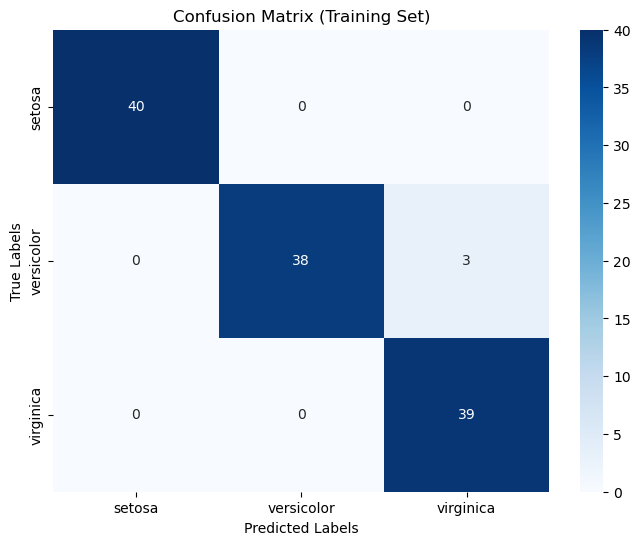

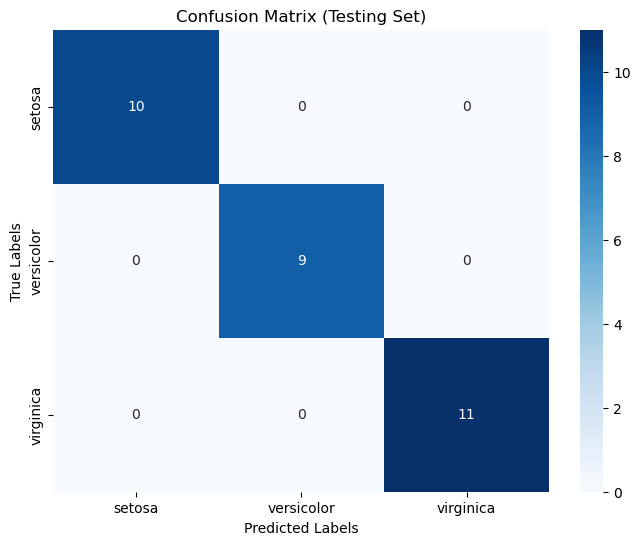

In [88]:
# Your code here :
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# generate confusion matrix for the training set
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

# generate confusion matrix for the testing set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# confusion matrix
def plot_confusion_matrix(matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(title)
    plt.show()

# plot confusion matrix for the training set
plot_confusion_matrix(conf_matrix_train, "Confusion Matrix (Training Set)")

# plot confusion matrix for the testing set
plot_confusion_matrix(conf_matrix_test, "Confusion Matrix (Testing Set)")

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [26]:
# Have fun here !